# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
import torch
from torch import nn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split

## Question 1

### 1.(a)

In [2]:
t1 = time.time()

In [3]:
#read and modify training dataset
data = pd.read_csv('Train_file.csv',header=None)
df = pd.DataFrame(data=data)
labels = df.iloc[:,60]
df = df.drop(df.columns[[60]], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-10.120651,2.515380,1.823152,1.508992,-1.719560,-1.894340,-1.105240,-1.882580,1.283309,-1.349106,...,0.092580,0.028268,-0.163431,0.032981,0.041419,0.062175,-0.025429,0.072103,-0.054116,0.049799
1,-4.889809,-5.689037,-3.359693,-2.125163,0.261292,-1.499884,0.754239,-1.677804,0.495266,-1.082571,...,0.139837,0.009443,-0.025915,-0.107059,-0.055360,0.010194,-0.097698,-0.105427,-0.088457,-0.021961
2,-1.694022,-5.086290,-4.164934,-2.412973,-4.749922,-0.730738,-0.726216,-2.307999,0.666796,0.516605,...,-0.187182,0.049961,-0.055671,0.001667,-0.203994,0.225937,0.233620,0.110080,0.036043,-0.200711
3,-4.241995,-5.011858,-3.345426,-3.906843,1.229525,1.224371,-0.399490,-1.617319,-0.427983,0.644910,...,-0.029452,-0.059464,0.055713,-0.002794,-0.028805,-0.081924,-0.095755,0.093118,-0.022315,0.148809
4,-3.101878,-6.134078,-3.250782,-3.051343,0.591492,0.893184,-1.925571,-0.913248,0.228131,-0.977734,...,-0.183069,0.128475,-0.208654,-0.075758,0.121429,-0.085190,0.034585,0.233586,0.027971,0.197148


In [4]:
X = np.array(df).T
np.shape(X)

(60, 86060)

In [5]:
#labels
Y = np.array(labels).reshape(1,-1)
np.shape(Y)

(1, 86060)

In [6]:
#initialisation of weights and bias
w = np.ones(df.shape[1]).reshape(-1,1)
b = (np.ones(1)).reshape(-1,1)
np.shape(w),np.shape(b)

((60, 1), (1, 1))

In [7]:
#sigmoid function
def sigmoid(u):
    fx = (1 + np.exp(-u))**(-1)
    return fx

In [8]:
# weight and bias learning using logistic regression cost function
def propogation(w,b,X,Y):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m)*(np.dot(Y,np.log(Y_hat).T) + np.dot((1-Y),np.log(1-Y_hat).T)).reshape(-1)
    dw = (1/m)*(np.dot(X,(Y_hat-Y).T))
    db = (1/m)*np.sum(Y_hat-Y)
    #cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [9]:
# using 50 epochs and training weights and bias
#learning_rate = 0.01
#using no_of_batches=20 mini batches
eta = 0.01
epochs = 50
costs = []
no_of_batches = 20
#using batch of np.shape(y)[1] // no_of_batches
batch_size = np.shape(Y)[1]//no_of_batches
for i in range(epochs):
    X_batch = np.array(np.split(X[:,0:(batch_size*no_of_batches)],no_of_batches,1))
    Y_batch = np.array(np.split(Y[:,0:(batch_size*no_of_batches)],no_of_batches,1))
    for j in range(no_of_batches):
        grads, cost = propogation(w,b,X_batch[j],Y_batch[j])
        costs.append(cost)
        dw = grads["dw"]
        db = grads["db"]
        w = w - eta * dw
        b = b - eta * db
    


In [10]:
print(f'final cost is: {cost}')

final cost is: [0.37990167]


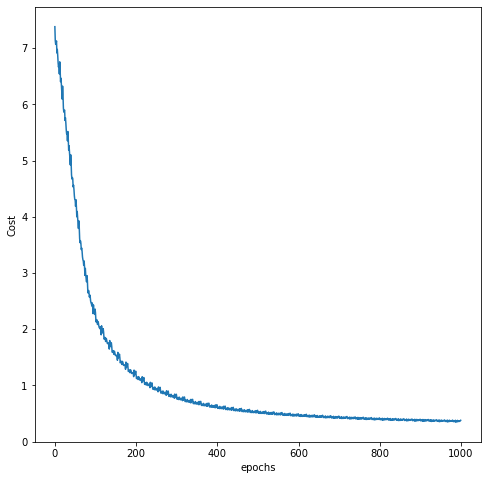

In [11]:
x = np.arange(epochs*no_of_batches)
plt.figure(figsize=(8,8))
plt.plot(x,costs)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.show()

### 1.(b)

In [12]:
#read and modify test dataset
data = pd.read_csv('Test_file.csv',header=None)
df = pd.DataFrame(data=data)
labels = df.iloc[:,60]
df = df.drop(df.columns[[60]], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3.863817,-4.783144,-3.905487,-0.535617,-1.551824,-1.499466,-0.859588,0.372485,-0.649211,-0.391779,...,0.049115,0.009052,0.058107,-0.094742,0.021947,0.042368,-0.036193,0.011716,-0.002627,-0.013202
1,-10.056757,-5.685840,-0.045440,-1.810329,3.860155,-0.612230,-1.352859,-0.210533,0.592775,-0.093317,...,-0.072195,0.100559,0.015884,-0.046483,0.082804,-0.037946,0.025628,-0.174175,0.012218,-0.044811
2,-1.752938,-2.699559,1.510144,0.081531,-1.604532,-1.849043,-2.171057,-3.236153,-0.541043,0.442342,...,0.027038,-0.070303,-0.012252,0.052579,-0.022195,-0.023904,0.158927,0.005207,0.015620,-0.021611
3,-3.170220,-4.744630,3.362495,-2.200058,-3.640497,-0.942428,-3.085365,0.144203,-1.065229,0.425932,...,-0.047964,0.193836,-0.050392,0.120305,-0.158155,-0.065002,-0.165253,-0.173285,-0.096143,0.064330
4,-3.519579,-3.659691,3.410805,0.665115,-5.036384,-3.107760,-1.921138,-0.518617,0.085033,-2.412228,...,-0.134195,0.035903,-0.045471,-0.105559,0.017580,0.021768,0.072975,0.027165,0.025080,0.024360


In [13]:
X = np.array(df).T
Y = np.array(labels).reshape(-1)

In [14]:
def predict(w, b, X):
    Y_hat = sigmoid(np.dot(w.T,X) + b)
    Y_predicted = np.ones(Y_hat.shape[1])
    for i in range(Y_hat.shape[1]):
        if (Y_hat[0][i] <= 0.5):
            Y_predicted[i] = 0
    return Y_predicted

In [15]:
Y_predicted = predict(w, b, X)
print(f"class wise f1 score : {f1_score(y_true=Y,y_pred=Y_predicted,average=None)} and total accuracy: {accuracy_score(y_true=Y,y_pred=Y_predicted)}")

class wise f1 score : [0.85304726 0.85153695] and total accuracy: 0.8522959657928983


In [16]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:8.727254152297974


## Changing hyperparameters(no_of_batches)

### 1.(a)

In [17]:
t1 = time.time()

In [18]:
#read and modify training dataset
data = pd.read_csv('Train_file.csv',header=None)
df = pd.DataFrame(data=data)
labels = df.iloc[:,60]
df = df.drop(df.columns[[60]], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-10.120651,2.515380,1.823152,1.508992,-1.719560,-1.894340,-1.105240,-1.882580,1.283309,-1.349106,...,0.092580,0.028268,-0.163431,0.032981,0.041419,0.062175,-0.025429,0.072103,-0.054116,0.049799
1,-4.889809,-5.689037,-3.359693,-2.125163,0.261292,-1.499884,0.754239,-1.677804,0.495266,-1.082571,...,0.139837,0.009443,-0.025915,-0.107059,-0.055360,0.010194,-0.097698,-0.105427,-0.088457,-0.021961
2,-1.694022,-5.086290,-4.164934,-2.412973,-4.749922,-0.730738,-0.726216,-2.307999,0.666796,0.516605,...,-0.187182,0.049961,-0.055671,0.001667,-0.203994,0.225937,0.233620,0.110080,0.036043,-0.200711
3,-4.241995,-5.011858,-3.345426,-3.906843,1.229525,1.224371,-0.399490,-1.617319,-0.427983,0.644910,...,-0.029452,-0.059464,0.055713,-0.002794,-0.028805,-0.081924,-0.095755,0.093118,-0.022315,0.148809
4,-3.101878,-6.134078,-3.250782,-3.051343,0.591492,0.893184,-1.925571,-0.913248,0.228131,-0.977734,...,-0.183069,0.128475,-0.208654,-0.075758,0.121429,-0.085190,0.034585,0.233586,0.027971,0.197148


In [19]:
X = np.array(df).T
np.shape(X)

(60, 86060)

In [20]:
#labels
Y = np.array(labels).reshape(1,-1)
np.shape(Y)

(1, 86060)

In [21]:
#initialisation of weights and bias
w = np.ones(df.shape[1]).reshape(-1,1)
b = (np.ones(1)).reshape(-1,1)
np.shape(w),np.shape(b)

((60, 1), (1, 1))

In [22]:
# using 100 epochs and training weights and bias
#learning_rate = 0.01
#using no_of_batches=100 mini batches
eta = 0.01
epochs = 20
costs = []
no_of_batches = 100
#using batch of np.shape(y)[1] // no_of_batches
batch_size = np.shape(Y)[1]//no_of_batches
for i in range(epochs):
    X_batch = np.array(np.split(X[:,0:(batch_size*no_of_batches)],no_of_batches,1))
    Y_batch = np.array(np.split(Y[:,0:(batch_size*no_of_batches)],no_of_batches,1))
    for j in range(no_of_batches):
        grads, cost = propogation(w,b,X_batch[j],Y_batch[j])
        costs.append(cost)
        dw = grads["dw"]
        db = grads["db"]
        w = w - eta * dw
        b = b - eta * db
    


In [23]:
print(f'final cost is: {cost}')

final cost is: [0.29719188]


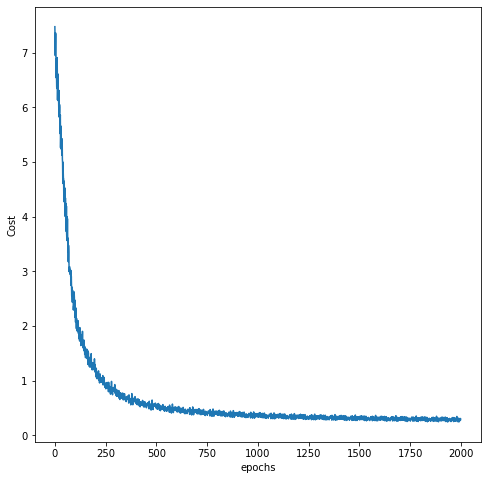

In [24]:
x = np.arange(epochs*no_of_batches)
plt.figure(figsize=(8,8))
plt.plot(x,costs)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.show()

### Note: Here we can see that when used a smaller batch size and even with low number of epochs, we are getting lower final cost on training set.

### 1.(b)

In [25]:
#read and modify test dataset
data = pd.read_csv('Test_file.csv',header=None)
df = pd.DataFrame(data=data)
labels = df.iloc[:,60]
df = df.drop(df.columns[[60]], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3.863817,-4.783144,-3.905487,-0.535617,-1.551824,-1.499466,-0.859588,0.372485,-0.649211,-0.391779,...,0.049115,0.009052,0.058107,-0.094742,0.021947,0.042368,-0.036193,0.011716,-0.002627,-0.013202
1,-10.056757,-5.685840,-0.045440,-1.810329,3.860155,-0.612230,-1.352859,-0.210533,0.592775,-0.093317,...,-0.072195,0.100559,0.015884,-0.046483,0.082804,-0.037946,0.025628,-0.174175,0.012218,-0.044811
2,-1.752938,-2.699559,1.510144,0.081531,-1.604532,-1.849043,-2.171057,-3.236153,-0.541043,0.442342,...,0.027038,-0.070303,-0.012252,0.052579,-0.022195,-0.023904,0.158927,0.005207,0.015620,-0.021611
3,-3.170220,-4.744630,3.362495,-2.200058,-3.640497,-0.942428,-3.085365,0.144203,-1.065229,0.425932,...,-0.047964,0.193836,-0.050392,0.120305,-0.158155,-0.065002,-0.165253,-0.173285,-0.096143,0.064330
4,-3.519579,-3.659691,3.410805,0.665115,-5.036384,-3.107760,-1.921138,-0.518617,0.085033,-2.412228,...,-0.134195,0.035903,-0.045471,-0.105559,0.017580,0.021768,0.072975,0.027165,0.025080,0.024360


In [26]:
X = np.array(df).T
Y = np.array(labels).reshape(-1)

In [27]:
def predict(w, b, X):
    Y_hat = sigmoid(np.dot(w.T,X) + b)
    Y_predicted = np.ones(Y_hat.shape[1])
    for i in range(Y_hat.shape[1]):
        if (Y_hat[0][i] <= 0.5):
            Y_predicted[i] = 0
    return Y_predicted

In [28]:
Y_predicted = predict(w, b, X)
print(f"f1 score : {f1_score(y_true=Y,y_pred=Y_predicted,average=None)} and total accuracy: {accuracy_score(y_true=Y,y_pred=Y_predicted)}")

f1 score : [0.87989886 0.8816609 ] and total accuracy: 0.8807863915225879


### Note : we are getting better accuracy

### 1.(b)

In [29]:
#read and modify test dataset
data = pd.read_csv('Test_file.csv',header=None)
df = pd.DataFrame(data=data)
labels = df.iloc[:,60]
df = df.drop(df.columns[[60]], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3.863817,-4.783144,-3.905487,-0.535617,-1.551824,-1.499466,-0.859588,0.372485,-0.649211,-0.391779,...,0.049115,0.009052,0.058107,-0.094742,0.021947,0.042368,-0.036193,0.011716,-0.002627,-0.013202
1,-10.056757,-5.685840,-0.045440,-1.810329,3.860155,-0.612230,-1.352859,-0.210533,0.592775,-0.093317,...,-0.072195,0.100559,0.015884,-0.046483,0.082804,-0.037946,0.025628,-0.174175,0.012218,-0.044811
2,-1.752938,-2.699559,1.510144,0.081531,-1.604532,-1.849043,-2.171057,-3.236153,-0.541043,0.442342,...,0.027038,-0.070303,-0.012252,0.052579,-0.022195,-0.023904,0.158927,0.005207,0.015620,-0.021611
3,-3.170220,-4.744630,3.362495,-2.200058,-3.640497,-0.942428,-3.085365,0.144203,-1.065229,0.425932,...,-0.047964,0.193836,-0.050392,0.120305,-0.158155,-0.065002,-0.165253,-0.173285,-0.096143,0.064330
4,-3.519579,-3.659691,3.410805,0.665115,-5.036384,-3.107760,-1.921138,-0.518617,0.085033,-2.412228,...,-0.134195,0.035903,-0.045471,-0.105559,0.017580,0.021768,0.072975,0.027165,0.025080,0.024360


In [30]:
X = np.array(df).T
Y = np.array(labels).reshape(-1)

In [31]:
def predict(w, b, X):
    Y_hat = sigmoid(np.dot(w.T,X) + b)
    Y_predicted = np.ones(Y_hat.shape[1])
    for i in range(Y_hat.shape[1]):
        if (Y_hat[0][i] <= 0.5):
            Y_predicted[i] = 0
    return Y_predicted

In [32]:
Y_predicted = predict(w, b, X)
print(f"f1 score : {f1_score(y_true=Y,y_pred=Y_predicted,average=None)} and total accuracy: {accuracy_score(y_true=Y,y_pred=Y_predicted)}")

f1 score : [0.87989886 0.8816609 ] and total accuracy: 0.8807863915225879


In [33]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:8.296905994415283


### Note : runtime is also lesser than before

## Question 2

### Remark: first row of dataset if being removed and then the txt file is imported

In [34]:
#first 36499 data points of class 0
# next 93565 data points of class 1
df = pd.read_table('MiniBooNE_PID.txt', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [35]:
df.shape

(130064, 50)

In [36]:
X0 = df.iloc[0:36499,:]
X1 = df.iloc[36499:,:]
Y0 = np.zeros(36499).reshape(-1,1)
Y1 = np.zeros(93565).reshape(-1,1)
X0.shape,X1.shape,Y0.shape,Y1.shape

((36499, 50), (93565, 50), (36499, 1), (93565, 1))

In [37]:
X0_test = np.array(X0.iloc[0:11000,:])
X0_train = np.array(X0.iloc[11000:,:])
X1_test = np.array(X1.iloc[0:11000,:])
X1_train = np.array(X1.iloc[11000:,:])
X0_test.shape,X0_train.shape,X1_test.shape,X1_train.shape


((11000, 50), (25499, 50), (11000, 50), (82565, 50))

In [38]:
Y0_test = np.zeros(11000).reshape(-1,1)
Y0_train = np.zeros(25499).reshape(-1,1)
Y1_test = np.ones(11000).reshape(-1,1)
Y1_train = np.ones(82565).reshape(-1,1)
Y0_test.shape,Y0_train.shape,Y1_test.shape,Y1_train.shape

((11000, 1), (25499, 1), (11000, 1), (82565, 1))

In [39]:
xtr = np.vstack((X0_train,X1_train))
xts = np.vstack((X0_test,X1_test))
ytr = np.vstack((Y0_train,Y1_train))
yts = np.vstack((Y0_test,Y1_test))
xtr.shape,xts.shape,ytr.shape,yts.shape

((108064, 50), (22000, 50), (108064, 1), (22000, 1))

In [40]:
#standardising data
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

In [41]:
xtr.shape,xts.shape

((108064, 50), (22000, 50))

### 2.(a)

In [42]:
#single neuron classifier with input layer and single neuron as output layer
#no hidden layers
class SimpleClassifier(nn.Module):
    def __init__(self,no_input_features):
        super().__init__()
        self.op = nn.Linear(in_features=no_input_features,out_features=1)
        
    def forward(self, x):
        x = self.op(x)
        return torch.sigmoid(x)

In [43]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        ## highly important
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()

In [44]:
def test(model, xts, yts,show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.zeros(pred.shape)
        yhat[pred > 0.5] = 1
        if(show==1):
            print(f"class wise f1 score : {f1_score(y_true=yts,y_pred=yhat,average=None)}")
            print("\tTest Accuracy : {} % ".format(sum(yhat==yts)*100/len(yhat)))

In [45]:
ytr = ytr.reshape(-1,1)
yts = yts.reshape(-1,1)

In [46]:

t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 500
epochs = 100

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.67825784 0.79356788]
	Test Accuracy : [74.85] % 
time elapsed:21.53942036628723


### Changing Batch Size

In [47]:
t1 = time.time()

In [48]:
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 100
epochs = 20

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    

class wise f1 score : [0.59143235 0.76888588]
	Test Accuracy : [70.47727273] % 


In [49]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:16.06813097000122


### Changing Batch Size

In [50]:
t1 = time.time()

In [51]:
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 150
epochs = 30

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    

class wise f1 score : [0.62663249 0.77844572]
	Test Accuracy : [72.19090909] % 


In [52]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:16.754286289215088


### Changing Batch Size

In [53]:
t1 = time.time()

In [54]:
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 200
epochs = 20

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    

class wise f1 score : [0.63349294 0.78011709]
	Test Accuracy : [72.51363636] % 


In [55]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:8.643693685531616


### Changing Batch Size

In [56]:
t1 = time.time()

In [57]:
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 300
epochs = 40

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    

class wise f1 score : [0.65658184 0.78672218]
	Test Accuracy : [73.68636364] % 


In [58]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:15.316665649414062


### Changing Batch Size

In [59]:
t1 = time.time()

In [60]:
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 400
epochs = 50

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    

class wise f1 score : [0.66474363 0.78917558]
	Test Accuracy : [74.11363636] % 


In [61]:
print(f'time elapsed:{time.time() - t1}')

time elapsed:12.716193675994873


### Note: Best accuracy achieved by changing hyperparameters is approx 74%

### 2.(b)

In [62]:
print('Original data specs:')
print(f'shape of xtr and ytr: {xtr.shape} and {ytr.shape}')
print(f'number of samples of 0 class: {np.sum(np.array(ytr) == 0, axis=0)} and 1 class: {np.sum(np.array(ytr) == 1, axis=0)}')
oversample = SMOTE()
xtr, ytr = oversample.fit_resample(xtr, ytr)
print('Data specs after balancing using SMOTE:')
print(f'shape of xtr and ytr: {xtr.shape} and {ytr.shape}')
print(f'number of samples of 0 class: {np.sum(np.array(ytr) == 0, axis=0)} and 1 class: {np.sum(np.array(ytr) == 1, axis=0)}')

Original data specs:
shape of xtr and ytr: (108064, 50) and (108064, 1)
number of samples of 0 class: [25499] and 1 class: [82565]
Data specs after balancing using SMOTE:
shape of xtr and ytr: (165130, 50) and (165130,)
number of samples of 0 class: 82565 and 1 class: 82565


In [63]:
#standardising data
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

In [64]:
ytr = ytr.reshape(-1,1)

In [65]:

t1 = time.time() 
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 500
epochs = 50

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    
print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.82642452 0.82602958]
	Test Accuracy : [82.62272727] % 
time elapsed:15.649390935897827


### Changing batch size

In [66]:
t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 100
epochs = 20

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
    
print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.82545334 0.78756424]
	Test Accuracy : [80.83636364] % 
time elapsed:23.65049123764038


### Changing batch size

In [67]:

t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 150
epochs = 30

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)
   
print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.83069511 0.81033153]
	Test Accuracy : [82.10909091] % 
time elapsed:27.52610182762146


### Changing batch size

In [68]:

t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 200
epochs = 40

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.83185452 0.81972309]
	Test Accuracy : [82.6] % 
time elapsed:30.76012086868286


### Changing batch size

In [69]:
t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 400
epochs = 50

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.82840504 0.82603323]
	Test Accuracy : [82.72272727] % 
time elapsed:19.24161720275879


### Changing batch size

In [70]:
t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 200
epochs = 100

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.83495828 0.82298634]
	Test Accuracy : [82.91818182] % 
time elapsed:74.15152144432068


### Changing batch size

In [71]:
t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 50
epochs = 20

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.78679883 0.66342378]
	Test Accuracy : [73.89545455] % 
time elapsed:47.188066244125366


### Changing batch size

In [72]:
t1 = time.time()
model = SimpleClassifier(X0.shape[1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size = 1000
epochs = 100

for i in range(epochs):
    #print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    #print("\tBCE Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts,i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

class wise f1 score : [0.82567041 0.82857787]
	Test Accuracy : [82.71363636] % 
time elapsed:21.075022220611572


### Note: Best accuracy achieved is approx 83%.
### Thus we can say our model gives better accuracy on Balanced Dataset

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
import torch
from torch import nn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split

## Question 3

In [74]:
X = pd.read_csv('mnist.csv')
Y = pd.read_csv('mnist_target.csv')
df = pd.concat([X, Y], axis=1)
X.shape,Y.shape,df.shape

((70000, 784), (70000, 1), (70000, 785))

In [75]:
xtr, xts, ytr, yts = train_test_split(X, Y, test_size=0.3, random_state=16)
xtr.shape,xts.shape,ytr.shape,yts.shape

((49000, 784), (21000, 784), (49000, 1), (21000, 1))

In [76]:
#standardising data
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

In [77]:
ytr = np.array(ytr)
yts = np.array(yts)

## 3.(a) 
## 3.(b)

In [78]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=10)
#         self.sig1 = nn.ReLU()
#         self.hl2 = nn.Linear(in_features=n_hl1, out_features=n_hl2)
#         self.sig2 = nn.Sigmoid()
#         self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
#         x = self.sig1(x)
#         x = self.hl2(x)
#         x = self.sig2(x)
#         x = self.op(x)
        return x.squeeze()
    
    

In [79]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [80]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.4423683285713196 
	Test Accuracy : [0.90685714]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.39483892917633057 
	Test Accuracy : [0.90519048]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.34864410758018494 
	Test Accuracy : [0.90509524]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.37297436594963074 
	Test Accuracy : [0.90390476]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.3820549249649048 
	Test Accuracy : [0.90419048]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.36964699625968933 
	Test Accuracy : [0.90404762]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.34679076075553894 
	Test Accuracy : [0.90390476]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.36090779304504395 
	Test Accuracy : [0.90309524]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.34525254368782043 
	Test Accuracy : [0.90319048]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.35070499777793884 
	Test Accuracy : [0.9

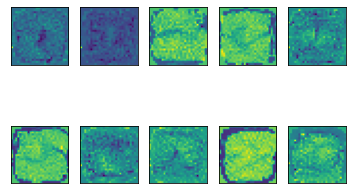

In [81]:

t1 = time.time()
model = SimpleClassifier(80,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

## 3.(c)

### Only 1 hidden layer with changing number of nodes in hidden layer

**1. n_hl = 50**

In [82]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=10)
#         self.sig2 = nn.Sigmoid()
#         self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
#         x = self.sig2(x)
#         x = self.op(x)
        return x.squeeze()
    
    

In [83]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [84]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.23676341772079468 
	Test Accuracy : [0.93695238]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.17434142529964447 
	Test Accuracy : [0.94419048]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.16110849380493164 
	Test Accuracy : [0.94842857]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.14043840765953064 
	Test Accuracy : [0.94752381]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.0986260399222374 
	Test Accuracy : [0.9537619]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.04774714633822441 
	Test Accuracy : [0.95280952]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.1390545517206192 
	Test Accuracy : [0.95219048]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.06803407520055771 
	Test Accuracy : [0.95342857]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.09665355831384659 
	Test Accuracy : [0.94961905]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.16252000629901886 
	Test Accuracy : [0.95

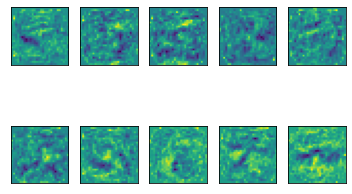

In [85]:

t1 = time.time()
model = SimpleClassifier(50,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

**2. n_hl = 20**

In [86]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=10)
#         self.sig2 = nn.Sigmoid()
#         self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
#         x = self.sig2(x)
#         x = self.op(x)
        return x.squeeze()
    
    

In [87]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [88]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.20789410173892975 
	Test Accuracy : [0.92728571]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.20028990507125854 
	Test Accuracy : [0.92966667]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.13873641192913055 
	Test Accuracy : [0.93652381]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.11007817089557648 
	Test Accuracy : [0.9367619]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.1095370352268219 
	Test Accuracy : [0.93761905]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.10782895982265472 
	Test Accuracy : [0.93333333]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.15145014226436615 
	Test Accuracy : [0.93314286]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.1369979828596115 
	Test Accuracy : [0.93333333]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.09512467682361603 
	Test Accuracy : [0.94038095]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.08457379043102264 
	Test Accuracy : [0.93

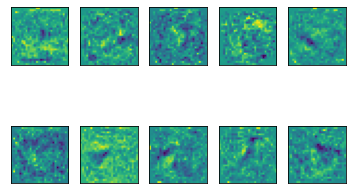

In [89]:

t1 = time.time()
model = SimpleClassifier(20,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

**3. n_hl = 100**

In [90]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=10)
#         self.sig2 = nn.Sigmoid()
#         self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
#         x = self.sig2(x)
#         x = self.op(x)
        return x.squeeze()
    
    

In [91]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [92]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.2294725626707077 
	Test Accuracy : [0.93842857]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.14962035417556763 
	Test Accuracy : [0.94633333]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.12615099549293518 
	Test Accuracy : [0.95247619]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.051958661526441574 
	Test Accuracy : [0.94747619]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.26926323771476746 
	Test Accuracy : [0.95452381]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.06393150240182877 
	Test Accuracy : [0.95733333]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.1296425610780716 
	Test Accuracy : [0.954]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.020119989290833473 
	Test Accuracy : [0.95547619]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.24139411747455597 
	Test Accuracy : [0.95795238]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.1005181297659874 
	Test Accuracy : [0.96128

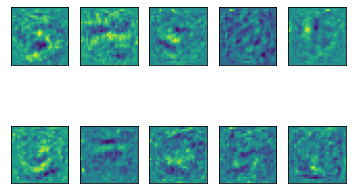

In [93]:

t1 = time.time()
model = SimpleClassifier(100,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')


### Note: As we can see by increasing number of hidden layers accuracy is increasing but so are number of parameters and thus time taken.

## 3.(d)

### Only 2 hidden layer with changing number of nodes in hidden layers

**1. n_hl1 = 50 and n_hl2 = 20**

In [94]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=n_hl2)
        self.sig2 = nn.ReLU()
        self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
        x = self.sig2(x)
        x = self.op(x)
        return x.squeeze()
    
    

In [95]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [96]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.17982473969459534 
	Test Accuracy : [0.94319048]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.1452411413192749 
	Test Accuracy : [0.94485714]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.09504032880067825 
	Test Accuracy : [0.95233333]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.10453750938177109 
	Test Accuracy : [0.95061905]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.09986840933561325 
	Test Accuracy : [0.95228571]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.08886357396841049 
	Test Accuracy : [0.95614286]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.07272187620401382 
	Test Accuracy : [0.95180952]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.06336020678281784 
	Test Accuracy : [0.955]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.04542834684252739 
	Test Accuracy : [0.95342857]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.06092403829097748 
	Test Accuracy : [0.94890

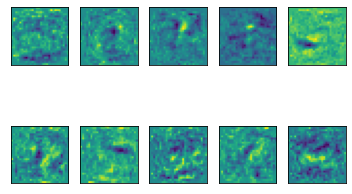

In [97]:

t1 = time.time()
model = SimpleClassifier(50,20)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

**2. n_hl1 = 70 and n_hl2 = 30**

In [98]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=n_hl2)
        self.sig2 = nn.ReLU()
        self.op = nn.Linear(in_features=n_hl2, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
        x = self.sig2(x)
        x = self.op(x)
        return x.squeeze()
    
    

In [99]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [100]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.18804866075515747 
	Test Accuracy : [0.9442381]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.12699784338474274 
	Test Accuracy : [0.94771429]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.0669584572315216 
	Test Accuracy : [0.95133333]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.1207289919257164 
	Test Accuracy : [0.95471429]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.09213794767856598 
	Test Accuracy : [0.95152381]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.11538039892911911 
	Test Accuracy : [0.95771429]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.13154511153697968 
	Test Accuracy : [0.95314286]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.12360671907663345 
	Test Accuracy : [0.9567619]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.04544137045741081 
	Test Accuracy : [0.95695238]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.17317955195903778 
	Test Accuracy : [0.953

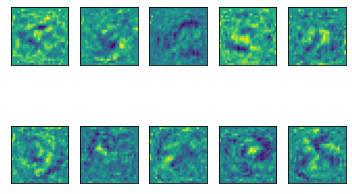

In [101]:

t1 = time.time()
model = SimpleClassifier(70,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')

### Only 3 hidden layers

**1. n_hl1 = 100 and n_hl2 = 60 and n_hl3 = 30**

In [102]:
class SimpleClassifier(nn.Module):
    def __init__(self, n_hl1, n_hl2, n_hl3):
        super().__init__()
        self.hl1 = nn.Linear(in_features=784, out_features=n_hl1)
        self.sig1 = nn.ReLU()
        self.hl2 = nn.Linear(in_features=n_hl1, out_features=n_hl2)
        self.sig2 = nn.ReLU()
        self.hl3 = nn.Linear(in_features=n_hl2, out_features=n_hl3)
        self.sig3 = nn.ReLU()
        self.op = nn.Linear(in_features=n_hl3, out_features=10)

        
    def forward(self, x):
        x = self.hl1(x)
        x = self.sig1(x)
        x = self.hl2(x)
        x = self.sig2(x)
        x = self.hl3(x)
        x = self.sig3(x)
        x = self.op(x)
        return x.squeeze()
    
    

In [103]:
def train(model, x, y, loss_fn, optimizer, batch_size):
    model.train()
    x, y = torch.Tensor(x), torch.Tensor(y)
    
    for i in range(0, len(x), batch_size):
        i_end = i+batch_size
        x_batch = x[i:min(i_end, len(x))]
        y_batch = y[i:min(i_end, len(x))]
        
        pred = model(x_batch)
        y_batch = (y_batch.to(torch.long)).squeeze_()
        loss = loss_fn(pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return loss.item()
    

In [104]:
def test(model, xts, yts, show):
    model.eval()
    with torch.no_grad():
        xts = torch.Tensor(xts)
        pred = model(xts)
        yhat = np.argmax((pred.data),axis=1).numpy()
        test_accuracy = np.sum(yts.reshape(-1)==yhat)/yhat.shape
        print(f"\tTest Accuracy : {test_accuracy}")
        if(show==1):
            score = f1_score(yts,yhat,average = None)
            print(f"\tClass wise Score : {score}")
            w = list(model.parameters())
            for i in range(10):
                plt.subplot(2,5,i+1)
                plt.imshow(w[0][i].detach().numpy().reshape(28,28))
                plt.yticks([])
                plt.xticks([])

--- epochs 1 ---
	Cross Entropy Loss (Training) : 0.18828052282333374 
	Test Accuracy : [0.94338095]
--- epochs 2 ---
	Cross Entropy Loss (Training) : 0.11766162514686584 
	Test Accuracy : [0.94819048]
--- epochs 3 ---
	Cross Entropy Loss (Training) : 0.12008615583181381 
	Test Accuracy : [0.95342857]
--- epochs 4 ---
	Cross Entropy Loss (Training) : 0.10088139772415161 
	Test Accuracy : [0.95347619]
--- epochs 5 ---
	Cross Entropy Loss (Training) : 0.07651787996292114 
	Test Accuracy : [0.95371429]
--- epochs 6 ---
	Cross Entropy Loss (Training) : 0.0726400837302208 
	Test Accuracy : [0.96238095]
--- epochs 7 ---
	Cross Entropy Loss (Training) : 0.0801565870642662 
	Test Accuracy : [0.96042857]
--- epochs 8 ---
	Cross Entropy Loss (Training) : 0.0627954751253128 
	Test Accuracy : [0.9587619]
--- epochs 9 ---
	Cross Entropy Loss (Training) : 0.05488991737365723 
	Test Accuracy : [0.96028571]
--- epochs 10 ---
	Cross Entropy Loss (Training) : 0.07354258745908737 
	Test Accuracy : [0.960

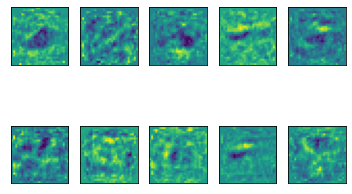

In [105]:

t1 = time.time()
model = SimpleClassifier(100,60,30)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
batch_size = 200
epochs = 10

for i in range(epochs):
    print("--- epochs {} ---".format(i+1))
    epochs_loss = train(model, xtr, ytr, loss_fn, optimizer, batch_size)
    print("\tCross Entropy Loss (Training) : {} ".format(epochs_loss))
    test(model, xts, yts, i-epochs+2)

print(f'time elapsed:{time.time() - t1}')